## 1. Importing Libraries

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import csv

from get_credentials import get_credentials
from create_lib import create_lib
from get_uniques import get_uniques
from df_d import df_duplicates
from df_nd import df_no_duplicates
from artistsgenres_dummies import artistsgenres_dummies

from sklearn import preprocessing

## 2. Import Data

In [13]:
cid,secret = get_credentials()

# Passing the credentials through the Spotify API (Authentication - without user)
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [14]:
# Adding the Playlist link and URI.
# 4000 songs
# playlist_link = "https://open.spotify.com/playlist/5F5yHyXHt6vp2taA7DrEhJ?si=b4f82e9651444f28"
# 500 songs
# playlist_link = "https://open.spotify.com/playlist/5CYdyJ0w4OVc1oitZWQvj3?si=76db4826bb254432"
# 16 songs
playlist_link = "https://open.spotify.com/playlist/7LaicnuGlBjUoHZ5Rd4tjm?si=e9f47ebd992b4d08"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

# Spotify API only allows you to take 100 songs at a time.
# This allows you to continue to take 100 songs as many times as you can from the given playlist.
results = sp.playlist_tracks(playlist_URI)
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

In [15]:
# for track in tracks:
#     print(track["track"]["name"])
#     print(sp.artist(track["track"]["artists"][0]["id"])["genres"], '\n')
#     pass
# print(sp.audio_analysis(track["track"]["id"]), '\n')
# print(sp.audio_features(track["track"]["uri"]), '\n')
# print(sp.track(track["track"]["uri"]), '\n')
# print(track["track"]["artists"][0]["id"], '\n')
# print(sp.artist(track["track"]["artists"][0]["id"])["genres"], '\n')

In [16]:
# Create dictionary of songs and uplicate index for identifying duplicate and unique songs.
lib, duplicate_index = create_lib(sp, tracks)
# Get the unique songs (-1) and index associated with duplicate songs
uniques, num_uniques = get_uniques(duplicate_index)
# Remove duplicate songs
lib = df_no_duplicates(lib)
df = pd.DataFrame.from_dict(lib, orient='index')
df = df.drop(['rating','local','song_fil','artists_fil','album_fil'], 1)
df.to_csv('Playlist.csv', encoding='utf-8', index = False)
# df.head()

duplicate_index
 [0, 0, 2, 2, 2, 5, 6, 5, 6, 5, -1, -1, -1, -1, -1, -1, -1]
uniques
 [-1, 0, 2, 5, 6]
Amount per uniques
 [7, 2, 3, 3, 2]


## 3. Pre-Processing Data

### Dummies for Artists and Genres

In [17]:
df.head(239)

,id,song,artists_info,artists,album,date,genres,time,popularity,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,uri,duplicates,uri0,uri1,uri2
track0,4,Adam's Song,"{'ar_name0': 'blink-182', 'ar_name0_fil': 'bli...",blink-182,Enema Of The State,,"[pop punk, punk, rock, socal pop punk]",249627,71,0.520,...,0.034000,0.000000,0.3640,0.3820,136.028,spotify:track:6xpDh0dXrkVp0Po1qrHUd8,"{'dup_id': 2, 'num_dup': 2, 'dup_loc0': 2, 'du...",spotify:track:43NhiKnrtGqztxDqXrcUux,spotify:track:4RNeJ1qy9feTpgCI8xxQM1,spotify:track:6xpDh0dXrkVp0Po1qrHUd8
track1,1,The Downfall Of Us All,"{'ar_name0': 'A Day To Remember', 'ar_name0_fi...",A Day To Remember,Homesick,,"[metalcore, pop punk]",209093,69,0.588,...,0.000252,0.000000,0.3260,0.7090,129.947,spotify:track:1KHKeIouP04dDtl0EetgED,"{'dup_id': 0, 'num_dup': 1, 'dup_loc0': 0, 'du...",spotify:track:6G7URf5rGe6MvNoiTtNEP7,spotify:track:1KHKeIouP04dDtl0EetgED,NaN
track2,16,Don't Stop the Party (feat. TJR),"{'ar_name0': 'Pitbull', 'ar_name0_fil': 'pitbu...","Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),,"[dance pop, latin, miami hip hop, pop, pop rap...",206120,66,0.722,...,0.007260,0.000000,0.3750,0.9520,127.008,spotify:track:3Tu7uWBecS6GsLsL8UONKn,"{'dup_id': -1, 'num_dup': 0}",spotify:track:3Tu7uWBecS6GsLsL8UONKn,NaN,NaN
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","{'ar_name0': 'A$AP Rocky', 'ar_name0_fil': 'a$...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),,"[east coast hip hop, hip hop, rap, conscious h...",372173,64,0.489,...,0.351000,0.000000,0.6980,0.7750,81.497,spotify:track:1eLU27PPFxBhbp1CBjPh9J,"{'dup_id': -1, 'num_dup': 0}",spotify:track:1eLU27PPFxBhbp1CBjPh9J,NaN,NaN
track4,6,Alive,"{'ar_name0': 'Empire of the Sun', 'ar_name0_fi...",Empire of the Sun,Ice On The Dune,,"[alternative dance, australian dance, australi...",204591,63,0.524,...,0.099700,0.000000,0.0708,0.3950,119.954,spotify:track:5WBnKCEsPwsvWHUZmLjS3s,"{'dup_id': 6, 'num_dup': 1, 'dup_loc0': 6, 'du...",spotify:track:5WBnKCEsPwsvWHUZmLjS3s,NaN,NaN
track5,10,On The Floor,"{'ar_name0': 'Jennifer Lopez', 'ar_name0_fil':...","Jennifer Lopez, Pitbull",LOVE?,,"[dance pop, pop, pop rap, urban contemporary, ...",284867,63,0.730,...,0.108000,0.000467,0.0690,0.5910,130.000,spotify:track:20zQZVyUNPbq8kZACdgYrh,"{'dup_id': -1, 'num_dup': 0}",spotify:track:20zQZVyUNPbq8kZACdgYrh,NaN,NaN
track6,13,น้ำแดงน้ำส้ม,"{'ar_name0': 'JV.JARVIS', 'ar_name0_fil': 'jv....",JV.JARVIS,น้ำแดงน้ำส้ม,,[thai viral pop],156373,62,0.845,...,0.456000,0.000002,0.1370,0.5260,132.084,spotify:track:1xxJiB2B3rMw8g85PPtcN7,"{'dup_id': -1, 'num_dup': 0}",spotify:track:1xxJiB2B3rMw8g85PPtcN7,NaN,NaN
track7,5,Alive,"{'ar_name0': 'Krewella', 'ar_name0_fil': 'krew...",Krewella,Play Hard EP,,"[dance pop, edm, electra, electro house, elect...",290760,55,0.663,...,0.004130,0.003180,0.2340,0.5670,128.002,spotify:track:2SHnUyZq0zwmvRIl4WY77G,"{'dup_id': 5, 'num_dup': 2, 'dup_loc0': 5, 'du...",spotify:track:2SHnUyZq0zwmvRIl4WY77G,NaN,NaN
track8,12,Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,"{'ar_name0': 'M&A', 'ar_name0_fil': 'm&a', 'ar...","M&A, Бэтси",Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,,[],176542,36,0.942,...,0.040000,0.002550,0.0992,0.1430,102.380,spotify:track:6WHei8TotCpUYMoEn0sEMw,"{'dup_id': -1, 'num_dup': 0}",spotify:track:6WHei8TotCpUYMoEn0sEMw,NaN,NaN
track9,11,$outh $ide $uicide,"{'ar_name0': '$uicideboy$', 'ar_name0_fil': '$...","$uicideboy$, Pouya",High Tide In The Snake's Nest,,"[dark trap, new orleans rap, underground hip h...",169320,0,0.797,...,0.005380,0.431000,0.0728,0.0477,109.997,spotify:track:4VsMart0lkjUtyQnmxloK6,"{'dup_id': -1, 'num_dup': 0}",spotify:track:4VsMart0lkjUtyQnmxloK6,NaN,NaN


In [18]:
# type(df.iloc[[237]]["genres"])
# len(df.iloc[[237]]["genres"])
# str(df.iloc[[237]]["genres"])
# # df.iloc[[238]]["genres"].tolist()

In [19]:
# df.drop(df[df["genres"] == "[]\n"].index)
# df.to_csv('Playlist2.csv', encoding='utf-8', index = False)
# str(df.iloc[[237]]["genres"])

There are 20 unique artists in the playlist.


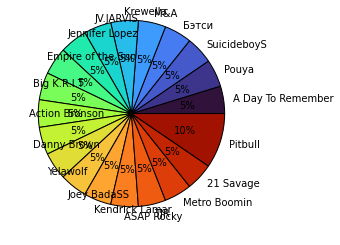

There are 50 unique genres in the playlist.


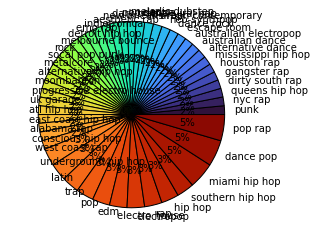

In [20]:
from artistsgenres_dummies import artistsgenres_dummies
df_artistsgenres, num_artists, num_genres = artistsgenres_dummies(df)

In [21]:
df_artistsgenres.columns

df_trackparams = df_artistsgenres.iloc[:,4:18]
df_trackgenres = df_artistsgenres.iloc[:,-num_genres:]

import regex as re
X = pd.concat([df_trackparams,df_trackgenres], axis = 1)
X = X.drop(['popularity'], 1)
X['date'] = X['date'].apply(lambda x: re.split('-',x)[0])
X['date'] = X['date'].apply(lambda x: int(x))
# X.dtypes
X

ValueError: invalid literal for int() with base 10: ''

In [ ]:
X.columns

Index(['date', 'time', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'punk', 'rock', 'socal pop punk', 'metalcore',
       'dance pop', 'latin', 'miami hip hop', 'pop', 'pop rap',
       'east coast hip hop', 'hip hop', 'rap', 'alternative dance',
       'australian dance', 'australian electropop', 'dance rock', 'electropop',
       'indietronica', 'neo-synthpop', 'urban contemporary', 'thai viral pop',
       'edm', 'electra', 'electro house', 'melodic dubstep', 'pop dance',
       'dark trap', 'new orleans rap', 'underground hip hop',
       'southern hip hop', 'trap'],
      dtype='object')

In [ ]:
X.iloc[:,:6] = preprocessing.StandardScaler().fit(X.iloc[:,:6]).transform(X.iloc[:,:6].astype(float))
X.iloc[:,7:13] = preprocessing.StandardScaler().fit(X.iloc[:,7:13]).transform(X.iloc[:,7:13].astype(float))
X


,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,edm,electra,electro house,melodic dubstep,pop dance,dark trap,new orleans rap,underground hip hop,southern hip hop,trap
track0,-2.413639,0.323306,-1.217200,0.243387,-1.244567,-0.123048,1,-0.783910,-0.599499,-0.321226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,-0.700734,-0.337531,-0.740516,0.830941,-1.244567,0.387220,1,-0.502782,-0.768134,-0.321226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,-0.186862,-0.386001,0.198831,1.257749,-0.149348,0.819848,1,-0.285306,-0.733116,-0.321226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,-0.015572,2.321207,-1.434511,0.814312,-0.696957,0.930701,1,2.161739,0.984512,-0.321226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,-0.015572,-0.410928,-1.189159,0.853113,0.124457,1.051906,1,-0.764461,-0.271204,-0.321226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track5,-0.358153,0.897833,0.254911,0.254472,-0.423153,0.137478,0,-0.668099,-0.229730,-0.317451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track6,1.354752,-1.197040,1.061067,-0.554800,1.219676,-1.746589,1,0.826826,1.509184,-0.321209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track7,-0.186862,0.993908,-0.214762,0.503906,1.219676,1.125233,1,-0.599144,-0.748756,-0.295525,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
track8,1.354752,-0.868219,1.741042,-0.915093,1.767285,-0.347773,0,-0.676940,-0.569518,-0.300616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track9,0.327009,-0.985961,0.724584,-1.192241,-0.970762,-0.331382,1,-0.356914,-0.742510,3.162156,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
df.head(5)

,id,song,artists_info,artists,album,date,genres,time,popularity,danceability,...,instrumentalness,liveness,valence,tempo,uri,duplicates,uri0,uri1,uri2,Cluster
track0,4,Adam's Song,"{'ar_name0': 'blink-182', 'ar_name0_fil': 'bli...",blink-182,Enema Of The State,1999-06-01,"[pop punk, punk, rock, socal pop punk]",249627,71,0.520,...,0.0,0.3640,0.382,136.028,spotify:track:6xpDh0dXrkVp0Po1qrHUd8,"{'dup_id': 2, 'num_dup': 2, 'dup_loc0': 2, 'du...",spotify:track:43NhiKnrtGqztxDqXrcUux,spotify:track:4RNeJ1qy9feTpgCI8xxQM1,spotify:track:6xpDh0dXrkVp0Po1qrHUd8,-1
track1,1,The Downfall Of Us All,"{'ar_name0': 'A Day To Remember', 'ar_name0_fi...",A Day To Remember,Homesick,2009-02-03,"[metalcore, pop punk]",209093,69,0.588,...,0.0,0.3260,0.709,129.947,spotify:track:1KHKeIouP04dDtl0EetgED,"{'dup_id': 0, 'num_dup': 1, 'dup_loc0': 0, 'du...",spotify:track:6G7URf5rGe6MvNoiTtNEP7,spotify:track:1KHKeIouP04dDtl0EetgED,NaN,-1
track2,16,Don't Stop the Party (feat. TJR),"{'ar_name0': 'Pitbull', 'ar_name0_fil': 'pitbu...","Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),2012-01-01,"[dance pop, latin, miami hip hop, pop, pop rap]",206120,66,0.722,...,0.0,0.3750,0.952,127.008,spotify:track:3Tu7uWBecS6GsLsL8UONKn,"{'dup_id': -1, 'num_dup': 0}",spotify:track:3Tu7uWBecS6GsLsL8UONKn,NaN,NaN,-1
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","{'ar_name0': 'A$AP Rocky', 'ar_name0_fil': 'a$...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),2013-01-01,"[east coast hip hop, hip hop, rap]",372173,64,0.489,...,0.0,0.6980,0.775,81.497,spotify:track:1eLU27PPFxBhbp1CBjPh9J,"{'dup_id': -1, 'num_dup': 0}",spotify:track:1eLU27PPFxBhbp1CBjPh9J,NaN,NaN,-1
track4,6,Alive,"{'ar_name0': 'Empire of the Sun', 'ar_name0_fi...",Empire of the Sun,Ice On The Dune,2013-01-01,"[alternative dance, australian dance, australi...",204591,63,0.524,...,0.0,0.0708,0.395,119.954,spotify:track:5WBnKCEsPwsvWHUZmLjS3s,"{'dup_id': 6, 'num_dup': 1, 'dup_loc0': 6, 'du...",spotify:track:5WBnKCEsPwsvWHUZmLjS3s,NaN,NaN,-1


In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
import numpy as np
sklearn.utils.check_random_state(1000)

# Compute DBSCAN
db = DBSCAN(eps=1.9, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Cluster"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

df[["song","artists","genres","Cluster"]].head(5)

,song,artists,genres,Cluster
track0,Adam's Song,blink-182,"[pop punk, punk, rock, socal pop punk]",-1
track1,The Downfall Of Us All,A Day To Remember,"[metalcore, pop punk]",-1
track2,Don't Stop the Party (feat. TJR),"Pitbull, TJR","[dance pop, latin, miami hip hop, pop, pop rap]",-1
track3,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...","[east coast hip hop, hip hop, rap]",-1
track4,Alive,Empire of the Sun,"[alternative dance, australian dance, australi...",-1
